<a href="https://colab.research.google.com/github/saadkiet/CNN-IMPROVED-CIFAR10-PROJECT-/blob/master/CNN_IMPROVED_CIFAR10_(PROJECT)_LAZY_PROGRAMMER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 : Step up and Install

In [0]:
pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 34kB/s 
     |████████████████████████████████| 3.9MB 50.5MB/s 
     |████████████████████████████████| 450kB 49.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=ab320b740a2a28b14cb9d52909daeb294767f046c8fb277d7b367017c613992d
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: gast 0.3.

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

In [0]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization

In [0]:
print(tf.__version__)

2.1.0


# Step 2 : Importing CIFAR10 Dataset

In [0]:
from tensorflow.keras.datasets import cifar10

In [0]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
xtrain.shape, ytrain.shape

((50000, 32, 32, 3), (50000, 1))

In [0]:
xtrain,xtest=xtrain/255,xtest/255

In [0]:
ytrain,ytest=ytrain.flatten(),ytest.flatten()

In [0]:
ytrain.shape

(50000,)

In [0]:
xtrain.max(),xtrain.min()

(1.0, 0.0)

In [0]:
class_names = ['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']

In [0]:
print(class_names)

['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']


In [0]:
xtrain[0].shape

(32, 32, 3)

# Step 3 : Building The CNN model

In [0]:
# Build the model using the functional API
#i = Input(shape=xtrain[0].shape)
#x = Conv2D(32, (3, 3), strides=2, activation='relu',padding='same')(i)

#x = Conv2D(64, (3, 3), strides=2, activation='relu',padding='same')(x)

#x = Conv2D(128, (3, 3), strides=2, activation='relu',padding='same')(x)

#x = Flatten()(x)
#x = Dropout(0.3)(x)
#x = Dense(1024, activation='relu')(x)
#x = Dropout(0.3)(x)
#x = Dense(10, activation='softmax')(x)

#model = Model(i, x)

In [0]:
# Build the model using the functional API
i = Input(shape=xtrain[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 

In [0]:
# Compile
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Fit
r = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=50)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 17s 339us/sample - loss: 1.2757 - accuracy: 0.5626 - val_loss: 1.0148 - val_accuracy: 0.6417
Epoch 2/50
50000/50000 [==============================] - 10s 202us/sample - loss: 0.8326 - accuracy: 0.7137 - val_loss: 0.7886 - val_accuracy: 0.7277
Epoch 3/50
50000/50000 [==============================] - 10s 202us/sample - loss: 0.6736 - accuracy: 0.7677 - val_loss: 0.6720 - val_accuracy: 0.7732
Epoch 4/50
50000/50000 [==============================] - 10s 202us/sample - loss: 0.5653 - accuracy: 0.8080 - val_loss: 0.6780 - val_accuracy: 0.7795
Epoch 5/50
50000/50000 [==============================] - 10s 204us/sample - loss: 0.4798 - accuracy: 0.8361 - val_loss: 0.8310 - val_accuracy: 0.7536
Epoch 6/50
50000/50000 [==============================] - 10s 202us/sample - loss: 0.4092 - accuracy: 0.8597 - val_loss: 0.6611 - val_accuracy: 0.7890
Epoch 7/50
50000/50000 [====================

# Step 4 : Making Predictions

In [0]:
ypred = model.predict(xtest)

In [0]:
print(ypred)

[[6.1186165e-07 1.4045834e-06 8.5321481e-05 ... 2.2389624e-07
  5.8395457e-08 9.3122232e-08]
 [5.5807846e-16 3.2194070e-11 3.0989315e-23 ... 2.0687923e-26
  1.0000000e+00 3.3679836e-21]
 [1.7907934e-02 7.5964642e-01 8.6272374e-04 ... 5.1142257e-07
  1.7678012e-01 4.2404272e-02]
 ...
 [2.8864649e-21 1.4459555e-23 3.6137943e-10 ... 1.8792149e-14
  6.0510030e-23 4.9038655e-21]
 [1.0583240e-07 9.9999988e-01 9.4501562e-10 ... 1.8559422e-08
  4.8981483e-12 3.7108865e-09]
 [2.7765993e-26 1.5594864e-27 2.3246256e-23 ... 1.0000000e+00
  2.7228718e-28 2.0033304e-26]]


In [0]:
ypred=np.argmax(ypred,axis=1)

In [0]:
print(ypred)

[3 8 1 ... 5 1 7]


In [0]:
print(ypred[10],ytest[10])

0 0


# Step 5 : Evaluating Model

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm=confusion_matrix(ypred,ytest)
print(cm)

print(accuracy_score(ypred,ytest))

[[850   3  38  22   7   8   7  10  26   5]
 [ 16 941   1   4   3   6   4   2  24  51]
 [ 31   1 780  57  29  43  22  20   8   3]
 [  6   3  26 678  18  85  20  23   5   8]
 [ 12   2  67  46 873  36  18  32   6   1]
 [  5   0  29  99  10 768   4  15   2   2]
 [  4   1  42  57  31  11 917   1   6   5]
 [ 16   1  12  23  24  38   1 890   1   5]
 [ 29   7   3   7   4   2   3   0 905   7]
 [ 31  41   2   7   1   3   4   7  17 913]]
0.8515


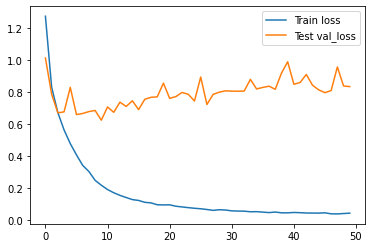

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Train loss')
plt.plot(r.history['val_loss'], label='Test val_loss')
plt.legend()


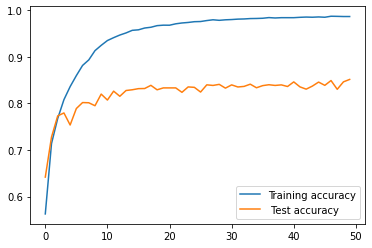

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='Training accuracy')
plt.plot(r.history['val_accuracy'], label=' Test accuracy')
plt.legend()

# IMPROVED CIFAER10

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
data_generator=ImageDataGenerator(width_shift_range=0.1,horizontal_flip=True,height_shift_range=0.1)

In [0]:
batch_size=32
train_generator=data_generator.flow(xtrain,ytrain,batch_size=batch_size)

In [0]:
steps_per_epoch = xtrain.shape[0] // batch_size
r1=model.fit(train_generator,epochs=50,steps_per_epoch=steps_per_epoch,validation_data=(xtest,ytest))

  ...
    to  
  ['...']
Train for 1562 steps, validate on 10000 samples
Epoch 1/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.5224 - accuracy: 0.8328 - val_loss: 0.5371 - val_accuracy: 0.8282
Epoch 2/50
1562/1562 [==============================] - 26s 16ms/step - loss: 0.4217 - accuracy: 0.8618 - val_loss: 0.4603 - val_accuracy: 0.8543
Epoch 3/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.3937 - accuracy: 0.8702 - val_loss: 0.4559 - val_accuracy: 0.8548
Epoch 4/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.3704 - accuracy: 0.8780 - val_loss: 0.4558 - val_accuracy: 0.8528
Epoch 5/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.3558 - accuracy: 0.8801 - val_loss: 0.4439 - val_accuracy: 0.8551
Epoch 6/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.3359 - accuracy: 0.8864 - val_loss: 0.4538 - val_accuracy: 0.8581
Epoch 7/50
1562/1562 [=============================

## Model Evaluation

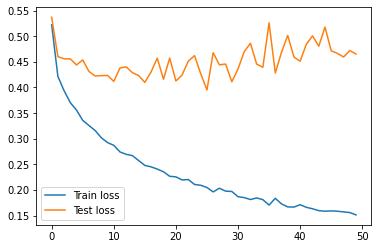

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r1.history['loss'], label='Train loss')
plt.plot(r1.history['val_loss'], label='Test loss')
plt.legend()

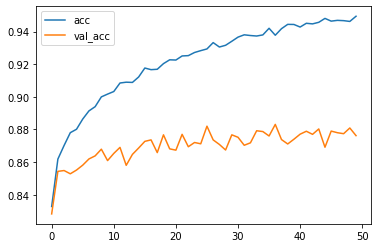

In [0]:
# Plot accuracy per iteration
plt.plot(r1.history['accuracy'], label='acc')
plt.plot(r1.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[871  10  29  11  16   7   5  11  23  17]
 [  2 952   1   2   0   1   0   1   7  34]
 [ 24   0 817  19  64  24  32  12   2   6]
 [ 11   2  26 679  70 126  46  21   5  14]
 [  2   1  17   5 924  12  23  15   0   1]
 [  4   2  22  65  40 820  15  26   2   4]
 [  2   1  30  12  23   6 918   2   3   3]
 [  6   1   8  13  28  21   0 916   1   6]
 [ 22  10   5   5   2   3   4   1 927  21]
 [  8  38   2   8   2   0   1   0   3 938]]


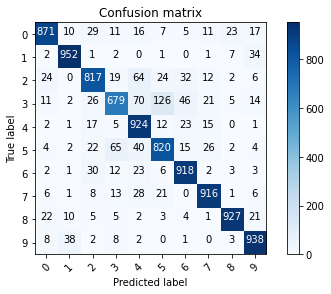

In [0]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(xtest).argmax(axis=1)
cm = confusion_matrix(ytest, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [0]:
print(class_names)

['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']


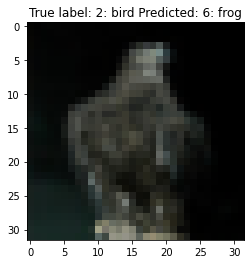

In [0]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != ytest)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(xtest[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (class_names[ytest[i]], class_names[p_test[i]]));